In [1]:
import Preprocessing as pp
import Global_Functions as gf
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation

In [2]:
temp_data_folder = "../Data/Temp_Data/"
image_path = "../Images/"
image_subfolder = "Proposal/"
image_folder = image_path + image_subfolder

gf.check_folder(temp_data_folder)
gf.check_folder(image_path)
gf.check_folder(image_folder)

Folder already exists.
Folder already exists.
Folder already exists.


In [3]:
df_1 = gf.open_CSV_file('experiment_1_short.csv', temp_data_folder)
df_4b = gf.open_CSV_file('experiment_4b_short.csv', temp_data_folder)
df_9 = gf.open_CSV_file('experiment_9_short.csv', temp_data_folder)

In [4]:
el_maxi = df_4b.loc[df_4b.idxmax()['el_power']]['el_power']
el_mini = df_4b.loc[df_4b.idxmin()['el_power']]['el_power']

In [5]:
seq_length = 120

In [6]:
def scale3(train, test, val):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler = scaler.fit(train)
    
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    
    val = val.reshape(val.shape[0], val.shape[1])
    val_scaled = scaler.transform(val)
    
    return scaler, train_scaled, test_scaled, val_scaled

In [7]:
X_train = np.array([[df_4b['input_voltage'][i+j] for j in range(seq_length)] for i in range(len(df_4b)-seq_length)])
X_val = np.array([[df_9['input_voltage'][i+j] for j in range(seq_length)] for i in range(len(df_9)-seq_length)])
X_test = np.array([[df_1['input_voltage'][i+j] for j in range(seq_length)] for i in range(len(df_1)-seq_length)])

In [8]:
y_train = np.array([df_4b['el_power'][i] for i in range(seq_length, len(df_4b))]).reshape(-1,1)
y_val = np.array([df_9['el_power'][i] for i in range(seq_length, len(df_9))]).reshape(-1,1)
y_test = np.array([df_1['el_power'][i] for i in range(seq_length, len(df_1))]).reshape(-1,1)

In [9]:
scaler_x, X_train, X_test, X_val = scale3(X_train, X_test, X_val)
scaler_y, y_train, y_test, y_val = scale3(y_train, y_test, y_val)

In [10]:
X_train = X_train.reshape((len(df_4b)-seq_length,seq_length,1))
X_val = X_val.reshape((len(df_9)-seq_length,seq_length,1))
X_test = X_test.reshape((len(df_1)-seq_length,seq_length,1))

In [11]:
y_train = y_train.reshape((len(df_4b)-seq_length, 1))
y_val = y_val.reshape((len(df_9)-seq_length, 1))
y_test = y_test.reshape((len(df_1)-seq_length, 1))

In [12]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=5)

In [13]:
model = Sequential()
model.add(LSTM(100, input_shape = (seq_length, 1), return_sequences = False))
model.add(Dense(1, activation = 'relu'))
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = 2, validation_data = (X_val, y_val))

Epoch 1/100
163/163 - 14s - loss: 0.0473 - val_loss: 0.0107
Epoch 2/100
163/163 - 14s - loss: 0.0305 - val_loss: 0.0088
Epoch 3/100
163/163 - 14s - loss: 0.0231 - val_loss: 0.0039
Epoch 4/100
163/163 - 14s - loss: 0.0208 - val_loss: 0.0056
Epoch 5/100
163/163 - 14s - loss: 0.0209 - val_loss: 0.0087
Epoch 6/100
163/163 - 14s - loss: 0.0190 - val_loss: 0.0026
Epoch 7/100
163/163 - 14s - loss: 0.0181 - val_loss: 0.0013
Epoch 8/100
163/163 - 14s - loss: 0.0187 - val_loss: 0.0046
Epoch 9/100
163/163 - 14s - loss: 0.0181 - val_loss: 0.0097
Epoch 10/100
163/163 - 14s - loss: 0.0177 - val_loss: 0.0144
Epoch 11/100
163/163 - 14s - loss: 0.0178 - val_loss: 0.0036
Epoch 12/100
163/163 - 14s - loss: 0.0169 - val_loss: 0.0103
Epoch 13/100
163/163 - 14s - loss: 0.0277 - val_loss: 0.0151
Epoch 14/100
163/163 - 14s - loss: 0.0329 - val_loss: 0.0638
Epoch 15/100
163/163 - 14s - loss: 0.0526 - val_loss: 0.0782
Epoch 16/100
163/163 - 14s - loss: 0.0287 - val_loss: 0.0367
Epoch 17/100
163/163 - 14s - loss

In [14]:
pred_train = model.predict(X_train)

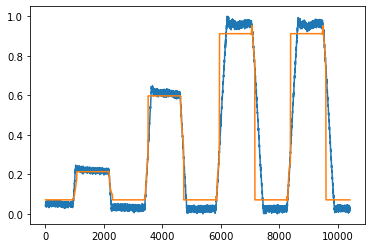

In [15]:
plt.plot(y_train)
plt.plot(pred_train)

In [16]:
pred_test = model.predict(X_test)

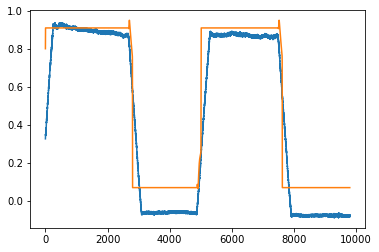

In [17]:
plt.plot(y_test)
plt.plot(pred_test)